In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [3]:
clean_data_df = pd.read_csv("clean_data.csv")
clean_data_df

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,heart_rate,diagnosis,arr_diagnosis
0,75,0,190,80,91,193,371,174,121,-16,63,8,0
1,56,1,165,64,81,174,401,149,39,25,53,6,0
2,54,0,172,95,138,163,386,185,102,96,75,10,0
3,55,0,175,94,100,202,380,179,143,28,71,1,1
4,75,0,190,80,88,181,360,177,103,-16,0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,63,1,1
448,37,0,190,85,100,137,361,201,73,86,73,10,0
449,36,0,166,68,108,176,365,194,116,-85,84,2,0
450,32,1,155,55,93,106,386,218,63,54,80,1,1


In [4]:
# male = 0, female = 1, arr_diagnosis = 1
# Drop all rows with 0 in arr_diagnosis
afib_clean_df = clean_data_df[clean_data_df.arr_diagnosis != 0]
afib_clean_df

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,heart_rate,diagnosis,arr_diagnosis
3,55,0,175,94,100,202,380,179,143,28,71,1,1
6,40,1,160,52,77,129,377,133,77,77,70,1,1
7,49,1,162,54,78,0,376,157,70,67,67,1,1
8,44,0,168,56,84,118,354,160,63,61,64,1,1
11,45,1,165,86,77,143,373,150,65,12,72,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,45,0,175,75,91,134,376,160,83,91,70,1,1
446,20,1,157,57,81,151,363,166,80,43,75,1,1
447,53,1,160,70,80,199,382,154,117,-37,63,1,1
450,32,1,155,55,93,106,386,218,63,54,80,1,1


In [5]:
# age, bins or means?
bins = [0,59,100]
labels = ["under 60", "over 60"]
afib_clean_df["age_group"]=pd.cut(afib_clean_df["age"],bins, labels=labels)
afib_clean_df


<ipython-input-5-89b34d530585>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afib_clean_df["age_group"]=pd.cut(afib_clean_df["age"],bins, labels=labels)


,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,heart_rate,diagnosis,arr_diagnosis,age_group
3,55,0,175,94,100,202,380,179,143,28,71,1,1,under 60
6,40,1,160,52,77,129,377,133,77,77,70,1,1,under 60
7,49,1,162,54,78,0,376,157,70,67,67,1,1,under 60
8,44,0,168,56,84,118,354,160,63,61,64,1,1,under 60
11,45,1,165,86,77,143,373,150,65,12,72,1,1,under 60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,45,0,175,75,91,134,376,160,83,91,70,1,1,under 60
446,20,1,157,57,81,151,363,166,80,43,75,1,1,under 60
447,53,1,160,70,80,199,382,154,117,-37,63,1,1,under 60
450,32,1,155,55,93,106,386,218,63,54,80,1,1,under 60


In [6]:
age_groups = afib_clean_df.groupby("age_group")["age"].count()
age_groups

age_group
under 60    197
over 60      48
Name: age, dtype: int64

In [7]:
expected = [0.84 * 245, 0.16 * 245]
#expected values taken from https://www.infoplease.com/us/census/demographic-statistics

In [8]:
# of freedom 2-1=1
critical_value = stats.chi2.ppf(q = 0.95, df = 1)
critical_value

3.841458820694124

In [9]:
stats.chisquare(age_groups, expected)

Power_divergenceResult(statistic=2.351797862001941, pvalue=0.1251386103557257)

In [10]:
#bar chart to show the finite numerical difference in ages.
age_summary_df = pd.DataFrame({"Number of Patients": age_groups})
age_summary_df.head()

,Number of Patients
age_group,
under 60,197
over 60,48


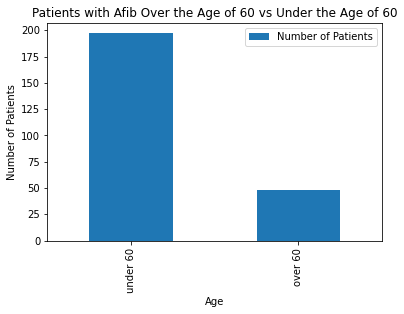

In [11]:
age_bar = age_summary_df.plot(kind="bar", title="Patients with Afib Over the Age of 60 vs Under the Age of 60")
age_bar.set_xlabel("Age")
age_bar.set_ylabel("Number of Patients")
plt.show()

In [12]:
# Gender
gender_groups = afib_clean_df.groupby("sex")["age"].count()
gender_groups

sex
0     85
1    160
Name: age, dtype: int64

In [13]:
gender_expected = (0.49 * 245, 0.51 * 245)

In [14]:
gender_critical_value = stats.chi2.ppf(q = 0.95, df = 1)
gender_critical_value

3.841458820694124

In [15]:
stats.chisquare(gender_groups, gender_expected)

Power_divergenceResult(statistic=20.065209757372333, pvalue=7.484589129007979e-06)

In [16]:
# Height in cm
bins = [0, 175, 187]
labels = ["average height", "above average height"]
afib_clean_df["height_group"]=pd.cut(afib_clean_df["height"],bins, labels=labels)
afib_clean_df

<ipython-input-16-df0494ea1ed2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afib_clean_df["height_group"]=pd.cut(afib_clean_df["height"],bins, labels=labels)


,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,heart_rate,diagnosis,arr_diagnosis,age_group,height_group
3,55,0,175,94,100,202,380,179,143,28,71,1,1,under 60,average height
6,40,1,160,52,77,129,377,133,77,77,70,1,1,under 60,average height
7,49,1,162,54,78,0,376,157,70,67,67,1,1,under 60,average height
8,44,0,168,56,84,118,354,160,63,61,64,1,1,under 60,average height
11,45,1,165,86,77,143,373,150,65,12,72,1,1,under 60,average height
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,45,0,175,75,91,134,376,160,83,91,70,1,1,under 60,average height
446,20,1,157,57,81,151,363,166,80,43,75,1,1,under 60,average height
447,53,1,160,70,80,199,382,154,117,-37,63,1,1,under 60,average height
450,32,1,155,55,93,106,386,218,63,54,80,1,1,under 60,average height


In [17]:
height_groups = afib_clean_df.groupby("height_group")["arr_diagnosis"].count()
height_groups

height_group
average height          219
above average height     26
Name: arr_diagnosis, dtype: int64

In [18]:
height_expected = (0.63 * 245, 0.37 * 245)

In [19]:
height_critical_value = stats.chi2.ppf(q = 0.95, df = 1)
height_critical_value

3.841458820694124

In [20]:
stats.chisquare( height_groups, height_expected)

Power_divergenceResult(statistic=73.18611614529982, pvalue=1.1798278277938523e-17)

In [21]:
afib_clean_df["weight"].value_counts()

70     15
65     13
80     11
63     11
75     10
68      9
60      8
62      8
55      8
58      8
53      7
72      7
74      7
85      7
82      7
54      6
56      6
59      5
73      5
52      5
78      4
95      4
45      4
48      4
67      4
61      4
90      4
57      4
64      3
86      3
88      3
50      3
66      2
71      2
51      2
77      2
79      2
83      2
84      2
89      2
97      2
104     2
76      2
47      1
44      1
42      1
40      1
33      1
124     1
69      1
106     1
81      1
93      1
94      1
96      1
98      1
100     1
105     1
18      1
Name: weight, dtype: int64

In [22]:
#weight
bins = [0, 70, 125]
labels = ["healthy average weight", "above average weight"]
afib_clean_df["weight_group"]=pd.cut(afib_clean_df["weight"],bins, labels=labels)
afib_clean_df

<ipython-input-22-9416f0f8b0ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afib_clean_df["weight_group"]=pd.cut(afib_clean_df["weight"],bins, labels=labels)


,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,heart_rate,diagnosis,arr_diagnosis,age_group,height_group,weight_group
3,55,0,175,94,100,202,380,179,143,28,71,1,1,under 60,average height,above average weight
6,40,1,160,52,77,129,377,133,77,77,70,1,1,under 60,average height,healthy average weight
7,49,1,162,54,78,0,376,157,70,67,67,1,1,under 60,average height,healthy average weight
8,44,0,168,56,84,118,354,160,63,61,64,1,1,under 60,average height,healthy average weight
11,45,1,165,86,77,143,373,150,65,12,72,1,1,under 60,average height,above average weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,45,0,175,75,91,134,376,160,83,91,70,1,1,under 60,average height,above average weight
446,20,1,157,57,81,151,363,166,80,43,75,1,1,under 60,average height,healthy average weight
447,53,1,160,70,80,199,382,154,117,-37,63,1,1,under 60,average height,healthy average weight
450,32,1,155,55,93,106,386,218,63,54,80,1,1,under 60,average height,healthy average weight


In [23]:
weight_groups = afib_clean_df.groupby("weight_group")["arr_diagnosis"].count()
weight_groups

weight_group
healthy average weight    146
above average weight       99
Name: arr_diagnosis, dtype: int64

In [24]:
#According to the cdc approx. 2/3 of adults are overweight-obese
weight_expected = (0.33 * 245, 0.67 * 245)

In [25]:
weight_critical_value = stats.chi2.ppf(q = 0.95, df = 1)
weight_critical_value

3.841458820694124

In [26]:
stats.chisquare( weight_groups, weight_expected)

Power_divergenceResult(statistic=78.35631674650864, pvalue=8.603380279300836e-19)

In [30]:
# BMI, equation kg/m2

afib_clean_df["BMI"] = afib_clean_df["weight"]/((afib_clean_df["height"]/100)**2)
afib_clean_df


<ipython-input-30-453272df7a54>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afib_clean_df["BMI"] = afib_clean_df["weight"]/((afib_clean_df["height"]/100)**2)


,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,heart_rate,diagnosis,arr_diagnosis,age_group,height_group,weight_group,BMI
3,55,0,175,94,100,202,380,179,143,28,71,1,1,under 60,average height,above average weight,30.693878
6,40,1,160,52,77,129,377,133,77,77,70,1,1,under 60,average height,healthy average weight,20.312500
7,49,1,162,54,78,0,376,157,70,67,67,1,1,under 60,average height,healthy average weight,20.576132
8,44,0,168,56,84,118,354,160,63,61,64,1,1,under 60,average height,healthy average weight,19.841270
11,45,1,165,86,77,143,373,150,65,12,72,1,1,under 60,average height,above average weight,31.588613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,45,0,175,75,91,134,376,160,83,91,70,1,1,under 60,average height,above average weight,24.489796
446,20,1,157,57,81,151,363,166,80,43,75,1,1,under 60,average height,healthy average weight,23.124670
447,53,1,160,70,80,199,382,154,117,-37,63,1,1,under 60,average height,healthy average weight,27.343750
450,32,1,155,55,93,106,386,218,63,54,80,1,1,under 60,average height,healthy average weight,22.892820


In [32]:
afib_clean_df["BMI"].max()

48.43749999999999

In [33]:
bins = [0, 24.9, 50]
labels = ["Healthy BMI", "Overweight or Obese"]
afib_clean_df["BMI_group"]=pd.cut(afib_clean_df["BMI"],bins, labels=labels)
afib_clean_df

<ipython-input-33-f38c878c5f8c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afib_clean_df["BMI_group"]=pd.cut(afib_clean_df["BMI"],bins, labels=labels)


,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,heart_rate,diagnosis,arr_diagnosis,age_group,height_group,weight_group,BMI,BMI_group
3,55,0,175,94,100,202,380,179,143,28,71,1,1,under 60,average height,above average weight,30.693878,Overweight or Obese
6,40,1,160,52,77,129,377,133,77,77,70,1,1,under 60,average height,healthy average weight,20.312500,Healthy BMI
7,49,1,162,54,78,0,376,157,70,67,67,1,1,under 60,average height,healthy average weight,20.576132,Healthy BMI
8,44,0,168,56,84,118,354,160,63,61,64,1,1,under 60,average height,healthy average weight,19.841270,Healthy BMI
11,45,1,165,86,77,143,373,150,65,12,72,1,1,under 60,average height,above average weight,31.588613,Overweight or Obese
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,45,0,175,75,91,134,376,160,83,91,70,1,1,under 60,average height,above average weight,24.489796,Healthy BMI
446,20,1,157,57,81,151,363,166,80,43,75,1,1,under 60,average height,healthy average weight,23.124670,Healthy BMI
447,53,1,160,70,80,199,382,154,117,-37,63,1,1,under 60,average height,healthy average weight,27.343750,Overweight or Obese
450,32,1,155,55,93,106,386,218,63,54,80,1,1,under 60,average height,healthy average weight,22.892820,Healthy BMI


In [38]:
BMI_groups = afib_clean_df.groupby("BMI_group")["arr_diagnosis"].count()
BMI_groups

BMI_group
Healthy BMI            115
Overweight or Obese    130
Name: arr_diagnosis, dtype: int64

In [39]:
BMI_expected = (0.33 * 245, 0.67 * 245)

In [40]:
BMI_critical_value = stats.chi2.ppf(q = 0.95, df = 1)
BMI_critical_value

3.841458820694124

In [41]:
stats.chisquare( BMI_groups, BMI_expected)

Power_divergenceResult(statistic=21.529135399071425, pvalue=3.484935954174932e-06)